### Download data

In [1]:
import os
import pandas
from urllib.request import urlretrieve

# Add following code for plot graph in jupyter
%matplotlib inline

In [2]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/'

def maybe_downlaod(filename):
    if(not os.path.exists(filename)):
        filename, _ = urlretrieve(url + filename, filename)
    return filename
    
filename = maybe_downlaod('iris.csv')

### Show data

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

# 设置缩放
sns.set_context("paper")
# 设置主题，seaborn内置5种主题，darkgrid, whitegrid, dark, white和ticks，默认为darkgrid
sns.set(style="white", color_codes=True)

# 使用pd读取后得到dataframe，用于显示
iris = pd.read_csv("Iris.csv")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Count the examples of each species

In [14]:
iris["species"].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

### Show the scatter plot of sepal_length and sepal_width using pandas plot

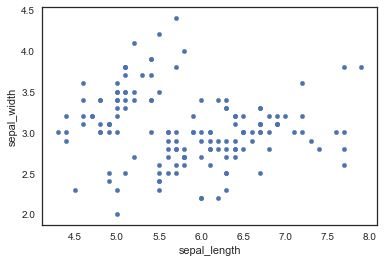

In [33]:
iris.plot(kind="scatter", x="sepal_length", y="sepal_width")

### Use the seaborn to plot

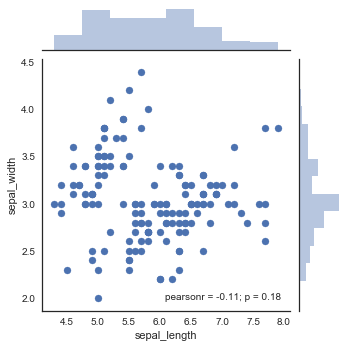

In [34]:
# data参数的格式应为dataframe
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=5)

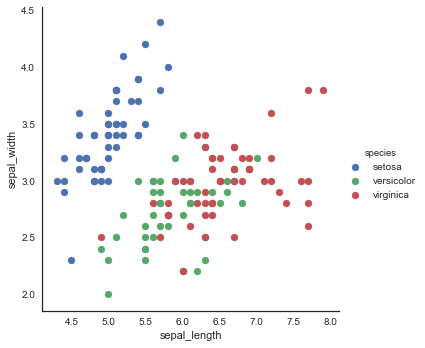

In [36]:
sns.FacetGrid(iris, hue="species", size=5) \
    .map(plt.scatter, "sepal_length", "sepal_width") \
    .add_legend()

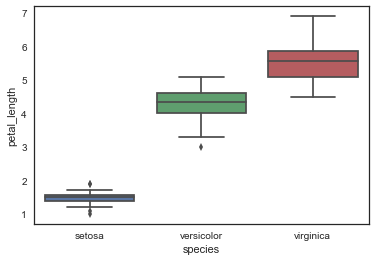

In [38]:
sns.boxplot(x="species", y="petal_length", data=iris)

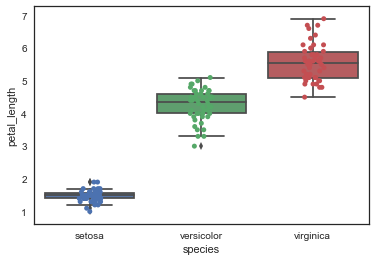

In [40]:
ax = sns.boxplot(x="species", y="petal_length", data=iris)
ax = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True)

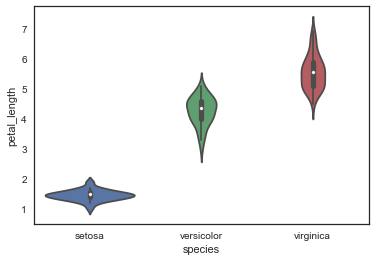

In [42]:
sns.violinplot(x="species", y="petal_length", data=iris, size=6)

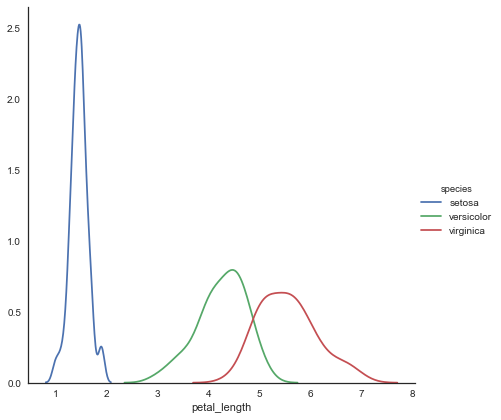

In [45]:
# hue参数设置的是按不同类型取不同颜色
sns.FacetGrid(iris, hue="species", size=6) \
    .map(sns.kdeplot, "petal_length") \
    .add_legend()

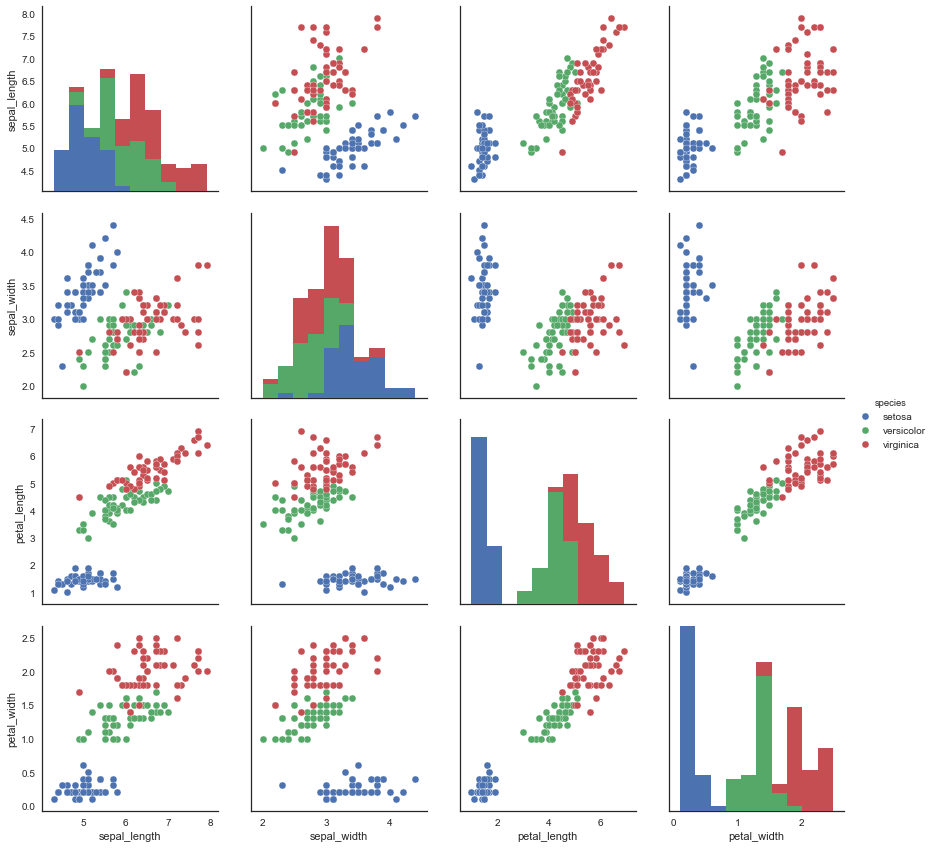

In [47]:
# pairplot绘制的是feature（这里是sepal_length, sepal_width, petal_length和petal_width）两两之间的相互分布关系
sns.pairplot(iris, hue="species", size=3)

### Draw the boxplot by pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F63200908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000019F633D8A58>]], dtype=object)

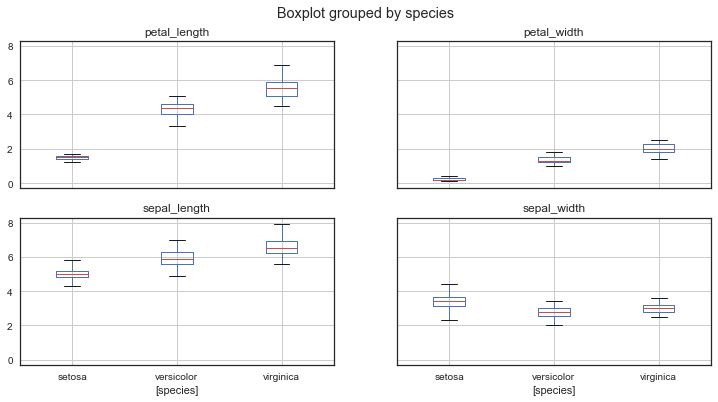

In [6]:
iris.boxplot(by="species", figsize=(12, 6))

### Andrews Curves
Andrews曲线将每个样本的属性值转化为傅里叶序列的系数来创建曲线。通过将每一类曲线标成不同颜色可以可视化聚类数据，属于相同类别的样本的曲线通常更加接近并构成了更大的结构。

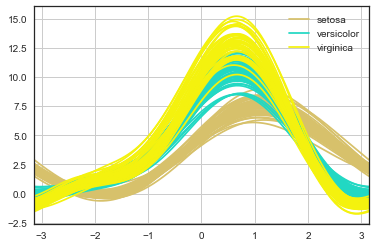

In [8]:
from pandas.tools.plotting import andrews_curves
andrews_curves(iris, "species")

### Parallel Coordinates
平行坐标也是一种多维可视化技术。它可以看到数据中的类别以及从视觉上估计其他的统计量。使用平行坐标时，每个点用线段联接。每个垂直的线代表一个属性。一组联接的线段表示一个数据点。可能是一类的数据点会更加接近。

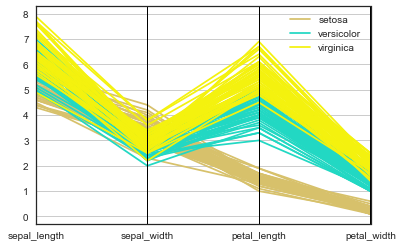

In [9]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris, "species")

### RadViz
RadViz是一种可视化多维数据的方式。它基于基本的弹簧压力最小化算法（在复杂网络分析中也会经常应用）。简单来说，将一组点放在一个平面上，每一个点代表一个属性，我们案例中有四个点，被放在一个单位圆上，接下来你可以设想每个数据集通过一个弹簧联接到每个点上，弹力和他们属性值成正比（属性值已经标准化），数据集在平面上的位置是弹簧的均衡位置。不同类的样本用不同颜色表示。

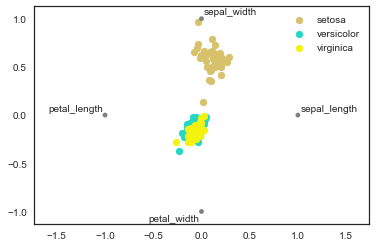

In [10]:
from pandas.tools.plotting import radviz
radviz(iris, "species")

### 因素分析（Factor Analysis, FA）
因素分析最初心理学家斯皮尔曼发明，用于研究人类的人格特质，著名的卡特尔16PF（16种相对独立的人格特征）就是应用因素分析方法得来。基于高斯潜在变量的一个简单线性模型，假设每一个观察值都是由低维的潜在变量加正态噪音构成。

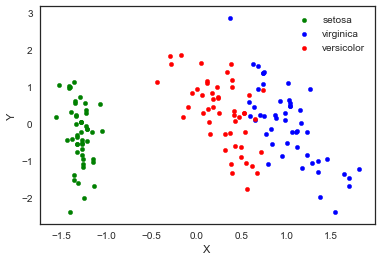

In [15]:
from sklearn import decomposition

pca = decomposition.FactorAnalysis(n_components=2)

X = pca.fit_transform(iris.ix[:, :-1].values)
pos = pd.DataFrame()
pos['X'] = X[:, 0]
pos['Y'] = X[:, 1]
pos['species'] = iris['species']
ax = pos.ix[pos['species']=='setosa'].plot(kind='scatter', x='X', y='Y', color='green', label='setosa')
ax = pos.ix[pos['species']=='virginica'].plot(kind='scatter', x='X', y='Y', color='blue', label='virginica', ax=ax)
pos.ix[pos['species']=='versicolor'].plot(kind='scatter', x='X', y='Y', color='red', label='versicolor', ax=ax)